In [0]:
#Loading the dataset mnist fashion 
from keras.datasets import fashion_mnist
import numpy as np
from keras.layers import Dense,Activation
from keras.models import Sequential


In [0]:
#loading the data
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [28]:
#cheking for the shape
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [29]:
#checking for number of labels
print(len(np.unique(y_test)))
#checking for the all labels
print(np.unique(y_train))

10
[0 1 2 3 4 5 6 7 8 9]


- Here we can see there are tottal ten lebels are there.So no our work is to build a model which can classify the labels by the data.

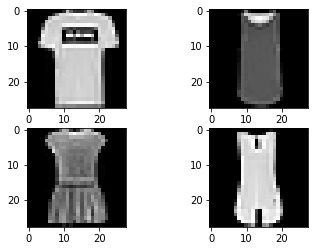

In [30]:
#Lets display some images from our dataset
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.imshow(x_train[1,:],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(x_train[2,:],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(x_train[3,:],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(x_train[4,:],cmap='gray')

- Here you can see the clothes from in our datset.Its also contain shoes and all will see in next coming steps

In [31]:
#lets check the shape of our images
print(np.shape(x_train[1]))
#lets normalize the data
x_train=x_train/255
x_test=x_test/255

(28, 28)


- The images in our datset are of size 28*28

In [0]:
#Lets costruct the model 
from keras.layers import Flatten


In [0]:
# instantietion
model=Sequential()


In [0]:
model.add(Flatten(input_shape=[28,28])) #Here we are flattening the images
model.add(Dense(40,activation='relu')) #Adding the activation function with 784 neurons along with activation function ReLU
model.add(Dense(10,activation='softmax')) #Adding the output layer with ten nerons along with softmax activation function


In [35]:
# Lets check the summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                31400     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                410       
Total params: 31,810
Trainable params: 31,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Now comppile our model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
#Now its time to fit the model with our data
model.fit(x_train,y_train)

Epoch 1/1
60000/60000 [==============================] - 7s 123us/step - loss: 0.5384 - acc: 0.8152


- Here you can see that our loss is high lets add one aurgumant called epoch 

In [38]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.4067 - acc: 0.8574
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.3723 - acc: 0.8677
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.3483 - acc: 0.8744
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.3322 - acc: 0.8803
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.3178 - acc: 0.8849
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.3090 - acc: 0.8874
Epoch 7/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.2985 - acc: 0.8909
Epoch 8/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.2904 - acc: 0.8932
Epoch 9/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.2816 - acc: 0.8957
Epoch 10/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2780 - a

- epochs is nothing but number of iteration to repeat the backpropagation process to be repeated. You can see that there at some point our loss become constant, that means it has reached its local minima. 

In [39]:
model.evaluate(x_test,y_test) #lets evaluate the model

10000/10000 [==============================] - 1s 64us/step


[0.37346610754728315, 0.8721]

- our model giving the accuracy of 88% and loss of 35.

In [0]:
y=model.predict(x_test)

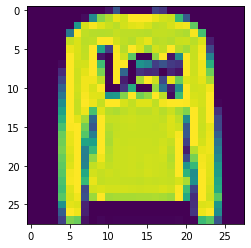

In [41]:
plt.imshow(x_test[1])

In [42]:
y[1]

array([1.4002162e-06, 4.4726812e-14, 9.9617910e-01, 9.3384762e-13,
       3.6276979e-03, 2.1250227e-22, 1.9176817e-04, 3.5052510e-24,
       3.1488098e-10, 1.7663720e-26], dtype=float32)

In [43]:
np.argmax(y[1])

2

- [T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot] these all things are present in the labels,and our model predicted correctly.

# now lets start with CNN

In [0]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.utils import to_categorical

In [0]:
#loading the data
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [0]:
#Reshaping the data
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [77]:
#Normalizing the data
x_train=x_train/255
x_test=x_test/255
x_test[0].shape

(28, 28, 1)

In [0]:
# Lets convert the labels to one hot encoding
y_train_one=to_categorical(y_train)
y_test_one=to_categorical(y_test)

In [79]:
# Lets see how encoded labels look like
print(y_train[1])
print(y_train_one[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [97]:
#Lets construct a model
model_cnn=Sequential()
model_cnn.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1))) #Adding convonutional with depth of 32 and kernal size with 3*3
model_cnn.add(MaxPooling2D(pool_size=(2,2))) #Adding the Maxpool of size 2*2
model_cnn.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten()) #Here we flattening our data
model_cnn.add(Dense(64,activation='relu'))
model_cnn.add(Dropout(.2)) #Here i am adding droupot with 0.2 this means it will remove the 20% of the unwanted neurons
model_cnn.add(Dense(10,activation='softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [98]:
model.summary() #summary of our model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                31400     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [100]:
model_cnn.fit(x_train,y_train)

Epoch 1/1
60000/60000 [==============================] - 13s 212us/step - loss: 0.5199 - acc: 0.8126


In [101]:
model_cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.3495 - acc: 0.8734
Epoch 2/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.3031 - acc: 0.8897
Epoch 3/5
60000/60000 [==============================] - 12s 204us/step - loss: 0.2763 - acc: 0.8992
Epoch 4/5
60000/60000 [==============================] - 12s 204us/step - loss: 0.2515 - acc: 0.9073
Epoch 5/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.2358 - acc: 0.9135


In [103]:
model_cnn.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 93us/step


[0.25965528067350385, 0.9074]

In [0]:
y=model_cnn.predict(x_test)

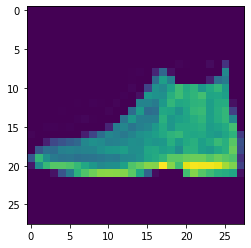

In [112]:
plt.imshow(x_test[0])

In [114]:
np.argmax(y[0])

9

- [T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot]

- Model is working good.

- Here we can for small epochs its giving the good result. Because if we use cnn the computation cost reduces.